In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [3]:
def plotFor(test,forecasts):
    # Plotting the true values and the predicted values
    plt.figure(figsize=(12, 4))
    plt.plot(test, label='True Values', marker='o')
    plt.plot(forecasts, label='Predicted Values', marker='x')
    plt.title('ARIMA Model Forecast for the Last 24 Observations')
    plt.xlabel('Time')
    plt.ylabel('WTI Price')
    plt.legend()
    plt.show()

def calculateMAE(test, forecasts):
    mae = mean_absolute_error(test, forecasts)
    return mae

def calculateMAPE(test, forecasts):
    percentage_errors = [abs((actual - predicted) / actual) * 100 for actual, predicted in zip(test, forecasts) if actual != 0]
    mape = sum(percentage_errors) / len(percentage_errors)
    return mape

def calculateMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    return mse

def calculateRMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    rmse = sqrt(mse)
    return rmse

In [4]:
df = pd.read_excel("ASIALNG.xlsx")
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df

,ASIALNG,ASIALNG_LAG1,ASIALNG_LAG2,ASIALNG_LAG3,ASIALNG_LAG4,USAGDP,Equity Market Volatility,3 Month Treasury Bill,Infectious Disease Tracker,COV19,RUWAR
DATE,,,,,,,,,,,
1996-07-01,0.002621,0.023906,0.081163,0.000000,-0.099806,0.020675,-4.19,0.09,-0.196710,0,0
1996-10-01,0.109019,0.002621,0.023906,0.081163,0.000000,0.012196,1.94,0.08,0.083382,0,0
1997-01-01,0.002345,0.109019,0.002621,0.023906,0.081163,0.015662,-0.40,-0.12,-0.446287,0,0
1997-04-01,-0.143281,0.002345,0.109019,0.002621,0.023906,0.012380,2.70,0.08,0.782759,0,0
1997-07-01,-0.061301,-0.143281,0.002345,0.109019,0.002621,0.018502,-0.41,-0.01,0.041964,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,0.553581,-0.148651,-0.112020,0.644932,0.604677,0.020373,-0.43,0.77,-0.083527,1,1
2022-10-01,-0.491094,0.553581,-0.148651,-0.112020,0.644932,0.017477,-3.25,1.58,-0.269102,1,1
2023-01-01,-0.538396,-0.491094,0.553581,-0.148651,-0.112020,0.015792,1.58,1.38,0.005921,1,1


In [5]:
y = df['ASIALNG']
X = df[["ASIALNG_LAG1","ASIALNG_LAG2","ASIALNG_LAG3","ASIALNG_LAG4","Equity Market Volatility","3 Month Treasury Bill","Infectious Disease Tracker","COV19","RUWAR"]]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                ASIALNG   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     8.367
Date:                Sat, 13 Jan 2024   Prob (F-statistic):           3.44e-09
Time:                        14:03:58   Log-Likelihood:                 39.802
No. Observations:                 109   AIC:                            -59.60
Df Residuals:                      99   BIC:                            -32.69
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [6]:
selected_columns = ["ASIALNG","ASIALNG_LAG1","ASIALNG_LAG2","ASIALNG_LAG3","COV19","RUWAR"]
pruned_df = df[selected_columns]

pruned_df = pruned_df.set_index(df.index)
pruned_df

,ASIALNG,ASIALNG_LAG1,ASIALNG_LAG2,ASIALNG_LAG3,COV19,RUWAR
DATE,,,,,,
1996-07-01,0.002621,0.023906,0.081163,0.000000,0,0
1996-10-01,0.109019,0.002621,0.023906,0.081163,0,0
1997-01-01,0.002345,0.109019,0.002621,0.023906,0,0
1997-04-01,-0.143281,0.002345,0.109019,0.002621,0,0
1997-07-01,-0.061301,-0.143281,0.002345,0.109019,0,0
...,...,...,...,...,...,...
2022-07-01,0.553581,-0.148651,-0.112020,0.644932,1,1
2022-10-01,-0.491094,0.553581,-0.148651,-0.112020,1,1
2023-01-01,-0.538396,-0.491094,0.553581,-0.148651,1,1


In [7]:
# Splitting the dataset
train_df = pruned_df.iloc[:-8]
test_df = pruned_df.iloc[-8:]


In [8]:
# Separate the target variable and the features
X_train = train_df[["ASIALNG_LAG1","ASIALNG_LAG2","ASIALNG_LAG3","COV19","RUWAR"]]
y_train = train_df["ASIALNG"]

X_test = test_df[["ASIALNG_LAG1","ASIALNG_LAG2","ASIALNG_LAG3","COV19","RUWAR"]]
y_test = test_df["ASIALNG"]

In [9]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.3],
    'n_estimators': [100, 500],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9],
    'reg_alpha': [0.1, 1],
    'reg_lambda': [1, 1.5]
}

# Create the model
model = xgb.XGBRegressor(objective='reg:squarederror')

# Set up the grid search
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_absolute_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

{'colsample_bytree': 0.9, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.9}


In [10]:
results = pd.DataFrame({'y_test': y_test, 'predictions': predictions})

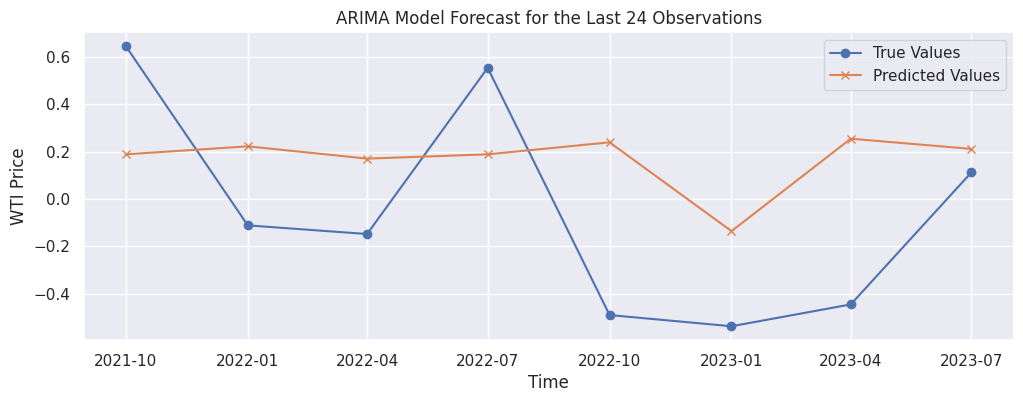

In [11]:
plotFor(results.y_test, results.predictions)

In [12]:
print(f"MAE: {calculateMAE(y_test, predictions):.4f}")
print(f"MAPE: {calculateMAPE(y_test, predictions):.4f} %")
print(f"MSE: {calculateMSE(y_test, predictions):.4f}")
print(f"RMSE: {calculateRMSE(y_test, predictions):.4f}")

MAE: 0.4258
MAPE: 139.8449 %
MSE: 0.2188
RMSE: 0.4677


## Saving Predictions

In [13]:
df = pd.DataFrame({'ASIALNG Q XG': predictions, 'Actual': y_test})
df.to_excel("ASIALNG_Q_XG_forecast.xlsx", index=True)
df

,ASIALNG Q XG,Actual
DATE,,
2021-10-01,0.188216,0.644932
2022-01-01,0.221997,-0.112020
2022-04-01,0.170031,-0.148651
2022-07-01,0.188104,0.553581
2022-10-01,0.238877,-0.491094
2023-01-01,-0.136471,-0.538396
2023-04-01,0.254214,-0.446175
2023-07-01,0.211066,0.111620


In [14]:
# Open a file in write mode
with open('ASIALNG Q XG Results.txt', 'w') as file:
    # Write the variables to the file
    file.write(f'{calculateMAE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMAPE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMSE(y_test, predictions):.4f}\n')
    file.write(f'{calculateRMSE(y_test, predictions):.4f}\n')